<a href="https://colab.research.google.com/github/Mr-rudra-narayan-sahu/assessment/blob/main/lab3watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch .nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset =torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64,
                                         shuffle=False)


100%|██████████| 170M/170M [00:02<00:00, 68.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic,watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [3]:
img=img_as_float(astronaut()[::2])

SILC number of segment:{}format(len(np.unique(segments_silc)))
watershed number of segment:{}format(len(np.unique(segments_watershed)))


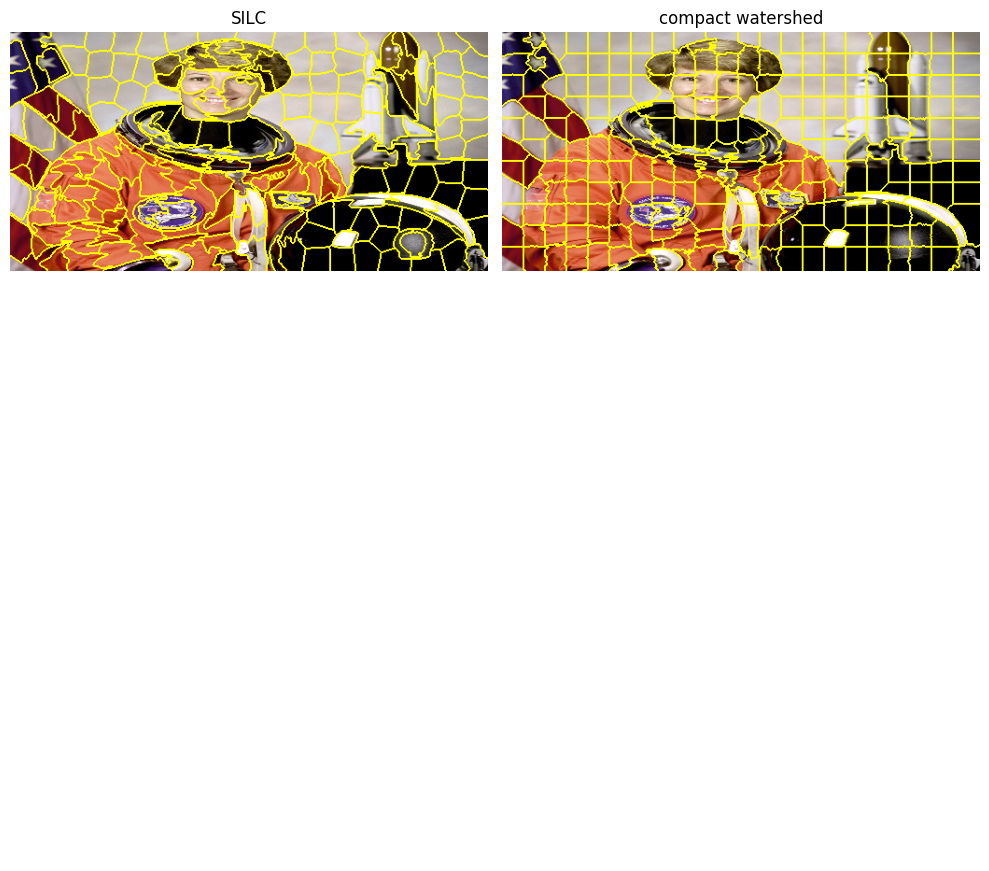

In [4]:
segments_slic = slic(img, n_segments=250,compactness=10,sigma=1)
gradient =sobel(rgb2gray(img))
segments_watershed = watershed(gradient,markers=250,compactness=0.01)
print('SILC number of segment:{}format(len(np.unique(segments_silc)))')
print('watershed number of segment:{}format(len(np.unique(segments_watershed)))')
fig,ax=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax[0,0].imshow(mark_boundaries(img,segments_slic))
ax[0,0].set_title('SILC')
ax[0,1].imshow(mark_boundaries(img,segments_watershed))
ax[0,1].set_title('compact watershed')
for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()
plt.show()

hog descriptor computation


In [5]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt


(235, 249, 4)


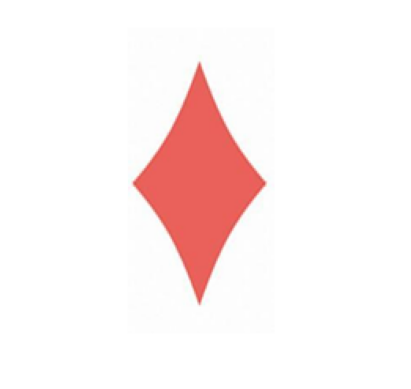

In [6]:
img = imread('diamond.png')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(762, 1239, 4)


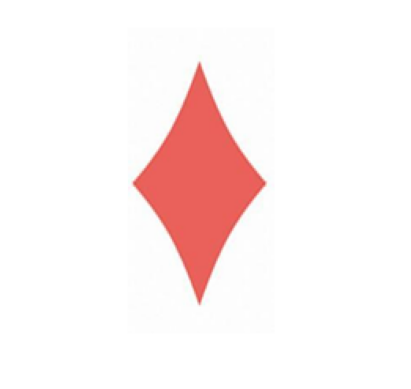

In [8]:
resizeed_img = resize(img,(254*3,413*3)) # This line has the typo
plt.axis("off")
plt.imshow(img)
print(resizeed_img.shape) # Change the variable name here to match

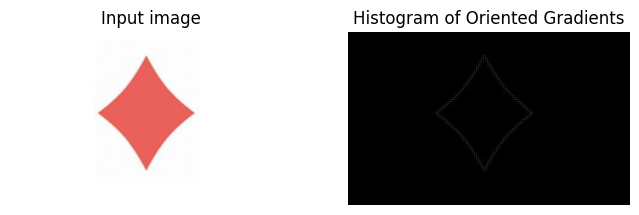

In [14]:
# prompt: hog_image code

fd, hog_image = hog(resizeed_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resizeed_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

SIFT MATCHING between two image

In [20]:
import sys
if 'google.colab' in sys.modules:
   import subprocess
   import subprocess
   subprocess.call("pip install -U opencv-python".split())
   subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
   subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())

from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)

rgb_1=cv2.cvtColor(cv2.imread("left.jpg"), cv2.COLOR_BGR2RGB)
gray_1= cv2.cvtColor(rgb_1, cv2.COLOR_RGB2GRAY) # Changed rgb_l to rgb_1
rgb_r =cv2.cvtColor(cv2.imread("right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

feature_extractor = cv2.SIFT_create ()

kp_1, des_1 = feature_extractor.detectAndCompute(gray_1, None)
kp_r, des_r = feature_extractor.detectAndCompute(gray_r, None)

In [25]:
bf = cv2.BFmatch()
matchs = bf.KnnMatch(desc_1, des_r,k=2)
good_and_second_good_match_list =[]
for m in match:
  if (m[0]/m[1]) < 0.5:
    good_and_second_good_match_list.append([m])
good_match_arr= np.asarray(good_and_second_good_match_list)[:,0]
# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
good_and_second_good_match_list[0:30],
None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure (figsize=(20, 20))
plt.imshow(im_matches)
plt.title ("keypoints matches")
plt.show()

AttributeError: module 'cv2' has no attribute 'BFmatch'

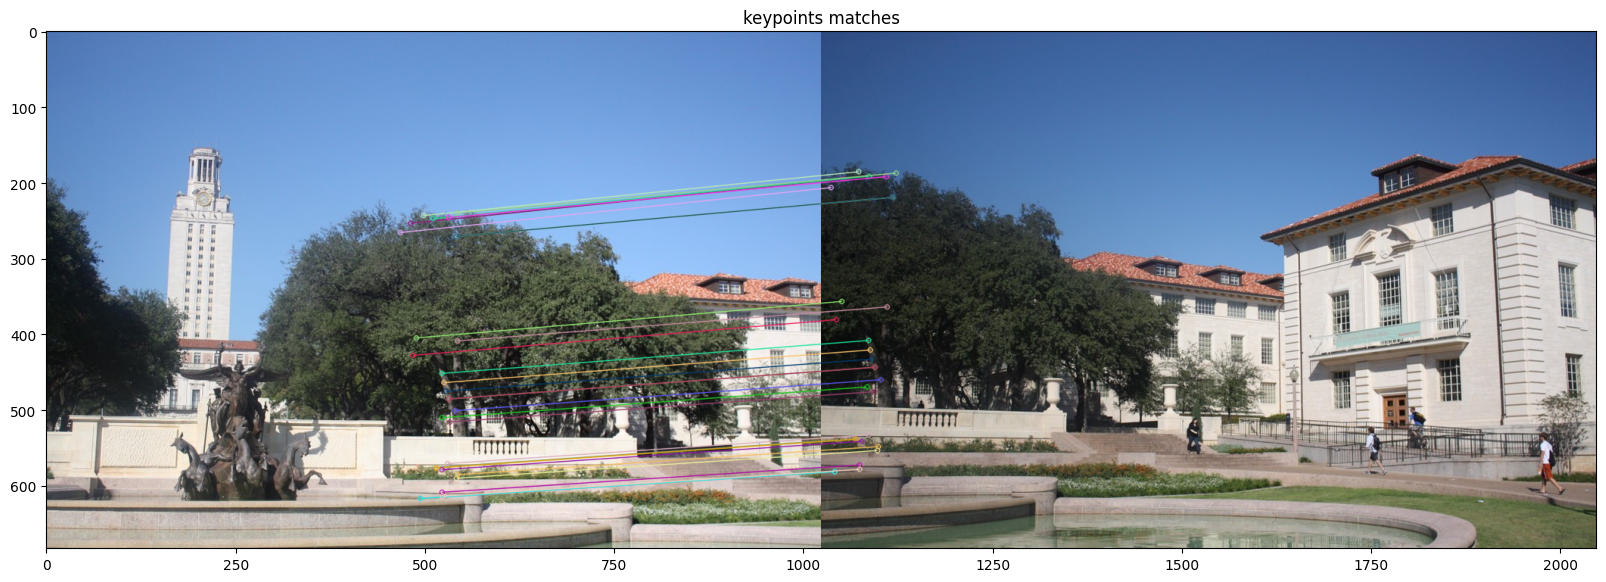

In [26]:
bf = cv2.BFMatcher() # Change BFmatch to BFMatcher
matches = bf.knnMatch(des_1, des_r, k=2) # Change to knnMatch

good_and_second_good_match_list = []
for m, n in matches: # Now m and n are the two best matches
    if m.distance < 0.5 * n.distance:
        good_and_second_good_match_list.append([m])

good_match_arr = np.asarray(good_and_second_good_match_list)[:, 0]

# show only 30 matches
# Change rgb_l, kp_l to rgb_1, kp_1
im_matches = cv2.drawMatchesKnn(rgb_1, kp_1, rgb_r, kp_r,
                               good_and_second_good_match_list[0:30],
                               None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()